# Multi Variate Regression

## As the name implies, multivariate regression is a technique that estimates a single regression model with:
-   more than one outcome variable. 
-   When there is more than one predictor variable in a multivariate regression model, the model is a multivariate multiple regression.

# **Multi Variate or Multi Variable Regression**


**Advanced Form of linear regression**
## $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

## $y$ is the response
## $\beta_0$ is the intercept
## $\beta_1$ is the coefficient for $x_1$ (the first feature)
## $\beta_n$ is the coefficient for $x_n$ (the nth feature)

## Defining the Dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Data=pd.read_csv('dataset/50_startups.csv')

In [3]:
Data.shape

(50, 5)

In [4]:
Data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
Data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [6]:
Data.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [7]:
type(Data.State.unique())

numpy.ndarray

In [8]:
# preparing the Dataset

In [9]:
Data_new=Data.iloc[:,0:4]
Data_new.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


## Now since the Data in State can't be modeled by Mathematics, we use One hot Encoding to turn it into 3 data field, each collectively responsible for 1 unique field i.e. New York, California, Florida.

In [10]:
Col=Data_new.columns.tolist()

In [11]:
Data_encoded=pd.get_dummies(Data_new[Col])

In [12]:
Data_encoded.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


# Now we pick up the predictors and pick a response set (y).

In [13]:
y=Data.iloc[:,4]
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(Data_encoded,y,random_state=3,test_size=.3)

In [16]:
X_train.shape

(35, 6)

In [18]:
X_test.shape

(15, 6)

In [19]:
Y_train.shape

(35L,)

In [20]:
Y_test.shape

(15L,)

In [22]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [23]:
lg=LinearRegression()

In [24]:
lg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## The above fits the training Data. Now we check the scores.

In [26]:
r2_score(Y_train,lg.predict(X_train))

0.95373120940099154

**Thus we obtain an accuracy score of 96% in the Dataset during Training. Lets check the testing scores.**

In [27]:
r2_score(Y_test,lg.predict(X_test))

0.91604518378699629

**So, an overall score of 91% is obtained by us in Test Cases**

# Visualization (using seaborn)

In [45]:
import seaborn as sb
import matplotlib.pyplot as plt

In [62]:
Data_new=Data_encoded.iloc[:,:3]
Data_encoded['Profit']=Data['Profit']
Data_new['Profit']=Data['Profit']
Data_encoded.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Profit
0,165349.20,136897.80,471784.10,0,0,1,192261.83
1,162597.70,151377.59,443898.53,1,0,0,191792.06
2,153441.51,101145.55,407934.54,0,1,0,191050.39
3,144372.41,118671.85,383199.62,0,0,1,182901.99
4,142107.34,91391.77,366168.42,0,1,0,166187.94


In [63]:
Data_new.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [64]:
Data_encoded.corr()   

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Profit
R&D Spend,1.000000,0.241955,0.724248,-0.143165,0.105711,0.039068,0.972900
Administration,0.241955,1.000000,-0.032154,-0.015478,0.010493,0.005145,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,-0.168875,0.205685,-0.033670,0.747766
State_California,-0.143165,-0.015478,-0.168875,1.000000,-0.492366,-0.515152,-0.145837
State_Florida,0.105711,0.010493,0.205685,-0.492366,1.000000,-0.492366,0.116244
State_New York,0.039068,0.005145,-0.033670,-0.515152,-0.492366,1.000000,0.031368
Profit,0.972900,0.200717,0.747766,-0.145837,0.116244,0.031368,1.000000


# Correlation :

Correlation is the component dependancy on others.Analogous to Covariance, It shows as to how much (in % <1) the variables influence each other.

## why is correlation a useful metric?

-  **Correlation can help in predicting one quantity from another**
-  **Correlation can (but often does not, as we will see in some examples below) indicate the presence of a causal      relationship**
-  **Correlation is used as a basic quantity and foundation for many other modeling techniques**

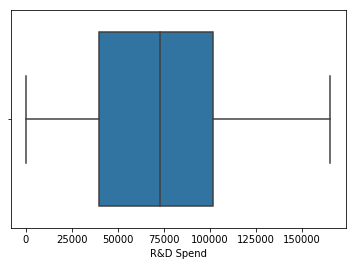

In [65]:
ax=sb.boxplot(x=Data_encoded["R&D Spend"])
plt.show(ax)

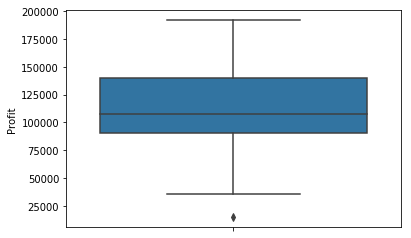

In [66]:
plt.show(sb.boxplot(y=Data_encoded['Profit']))

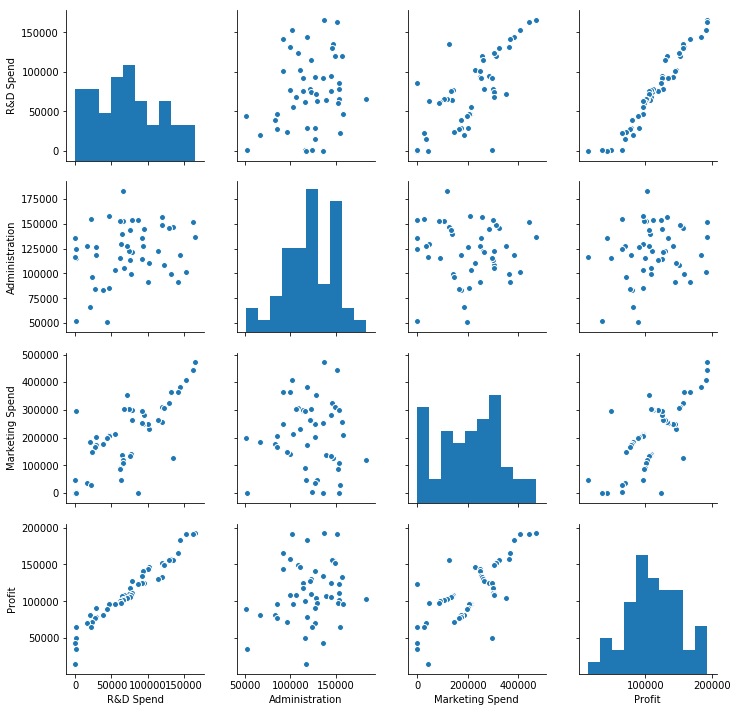

In [68]:
plt.show(sb.pairplot(Data_new))

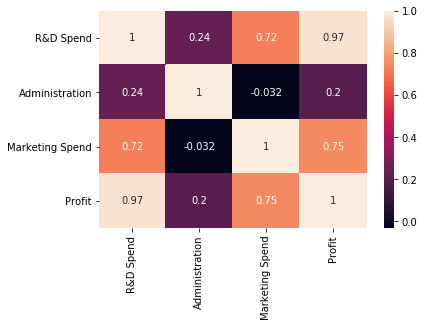

In [69]:
plt.show(sb.heatmap(Data_new.corr(),annot=True))

**To know the coefficients**

In [70]:
lg.coef_ #values of coefficients of responses.

array([  8.64102989e-01,  -1.40852933e-01,   1.63391258e-02,
         1.82721721e+03,  -1.50298638e+03,  -3.24230832e+02])

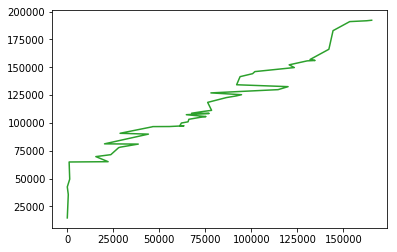

In [77]:
plt.plot(Data_new["R&D Spend"].values,Data_new['Profit'].values)
plt.show()

## The above is plotted since R&D Spend has the best known correlation, which is displayed above.

# This ends the Multi Variate Regression